In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df["Outcome"].value_counts()/len(df)*100  #data imbalanced

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

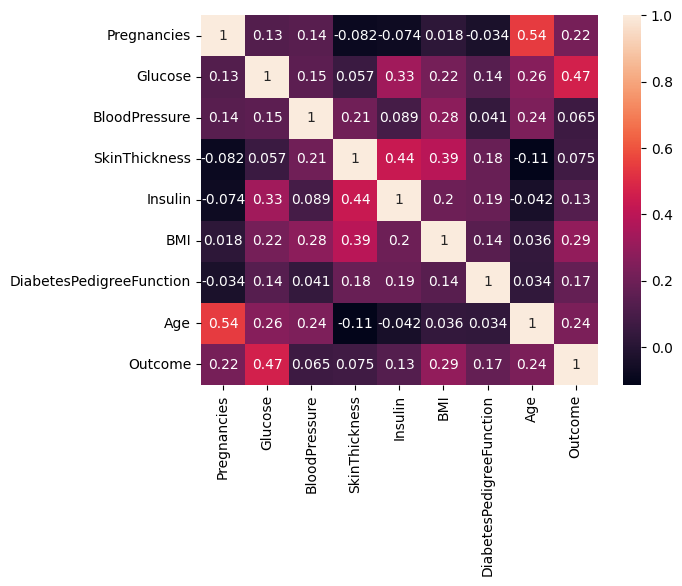

In [8]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
df["Age"].min(),df["Age"].max()

(21, 81)

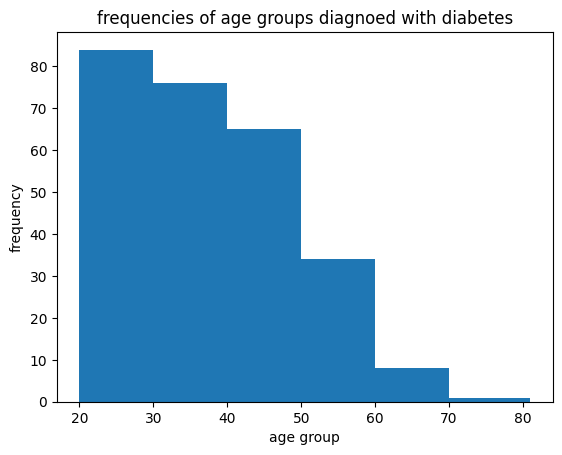

In [10]:
plt.hist(df["Age"].where(df["Outcome"]==1),bins=[20,30,40,50,60,70,81])
plt.title("frequencies of age groups diagnoed with diabetes")
plt.xlabel("age group")
plt.ylabel("frequency")
plt.show()

1. Majority people who are diagnosed with diabetes are from age group 20-50 which is approximately 94.5% .
2. approximately  5.46% people who are diagnosed with diabetes are from age group 50-80

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

1. Outcome correlation with other features that we got from the heatmap

Glucode > BMI > Age > Pregnancies > DiabetesPedigreeFunction > Insulin

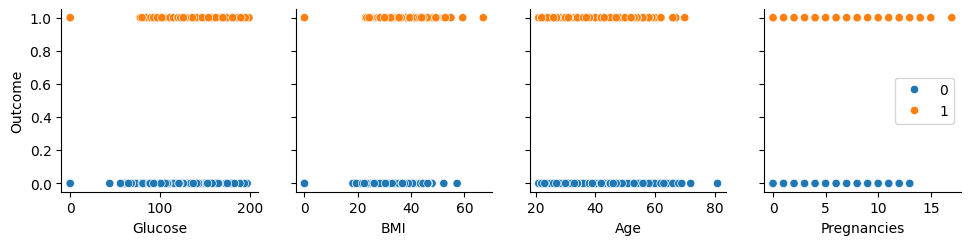

In [12]:
variables=['Glucose','BMI',"Age","Pregnancies"]
g=sns.PairGrid(df,hue="Outcome",x_vars=variables,y_vars=['Outcome'])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.legend()
plt.show()

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.duplicated().sum()

0

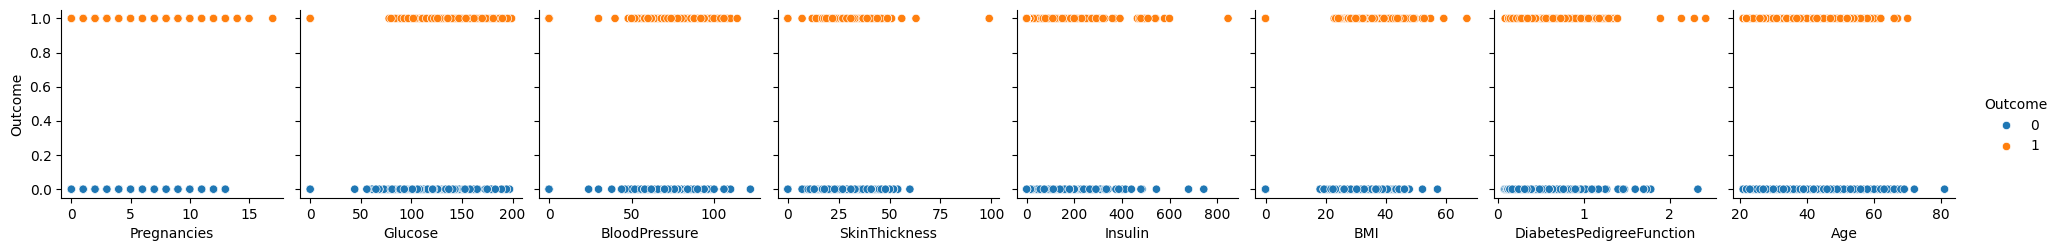

In [15]:
sns.pairplot(
    df,
    x_vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
   , y_vars=["Outcome"],hue="Outcome"
)

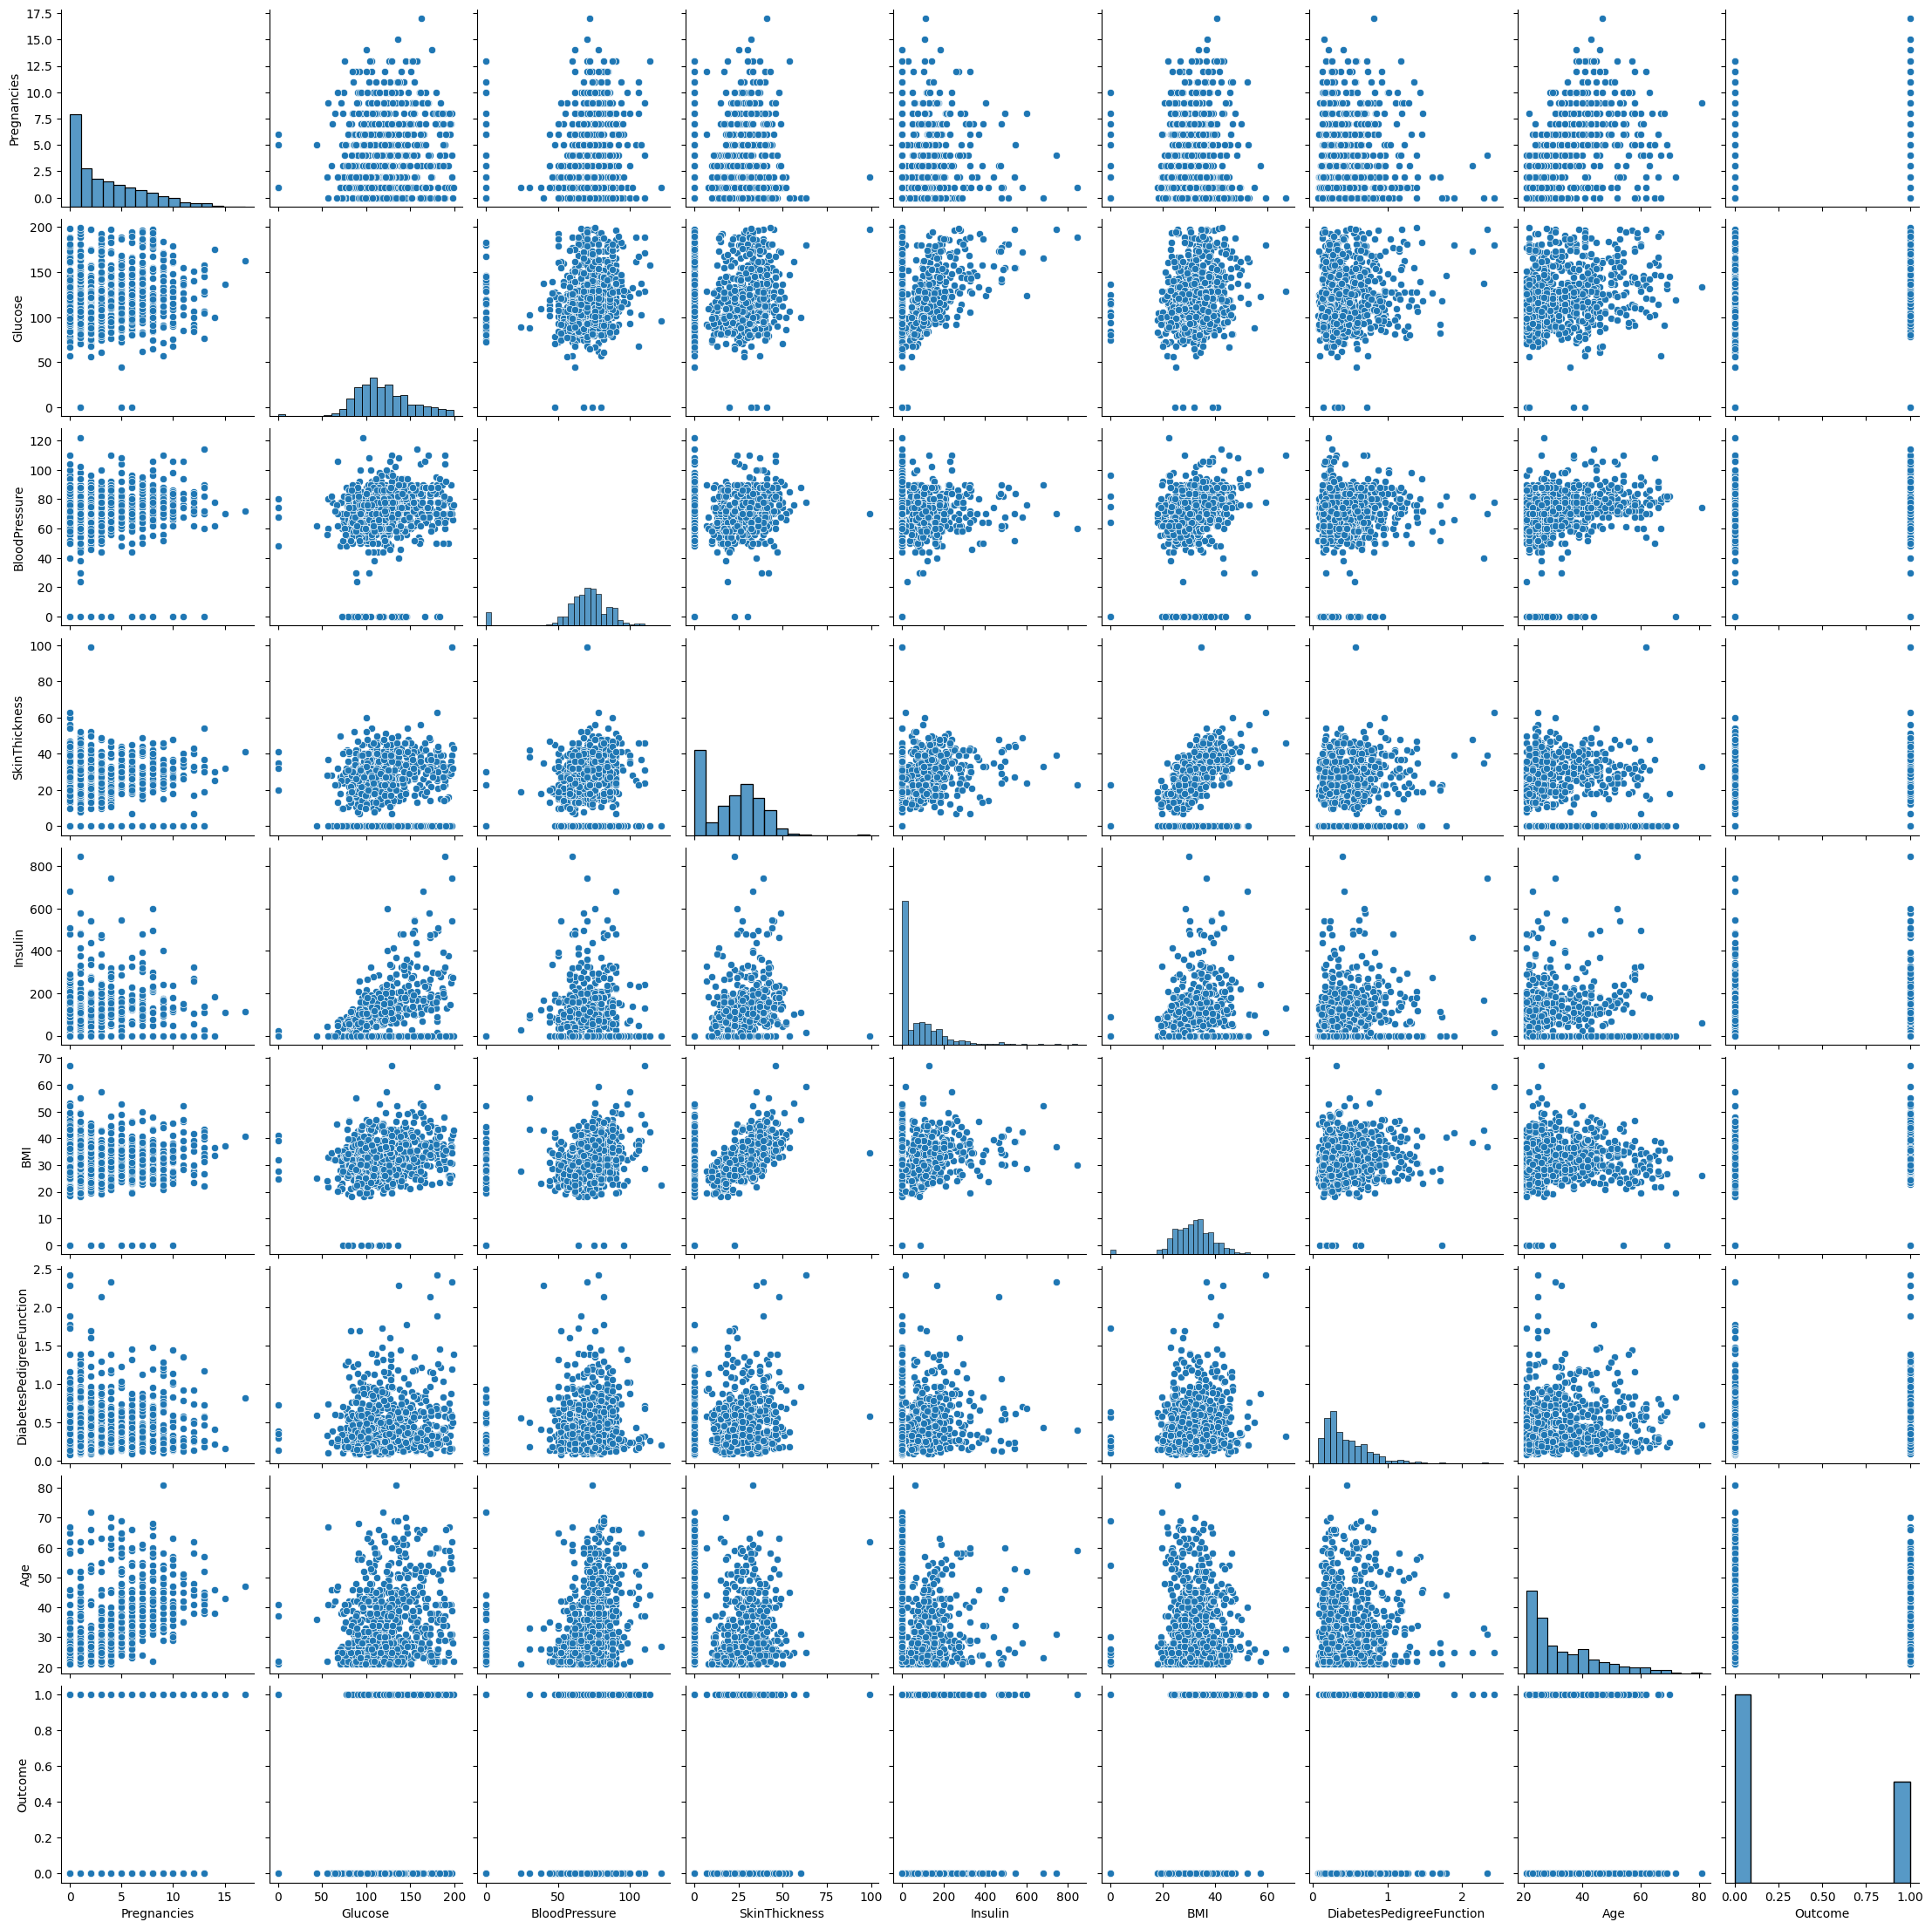

In [16]:
sns.pairplot(df)
%matplotlib inline

Outliers

In [17]:
x_vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

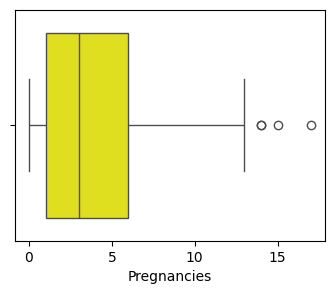

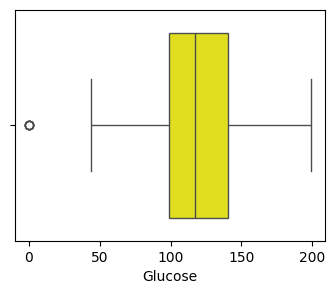

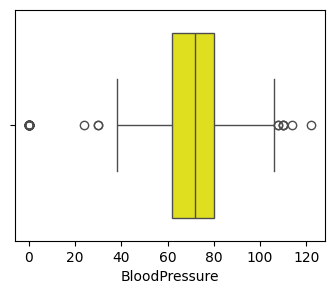

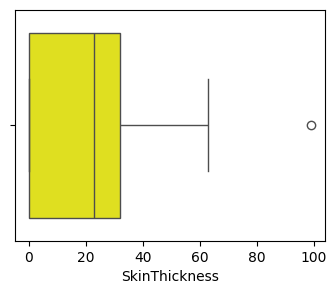

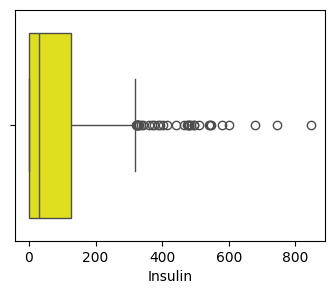

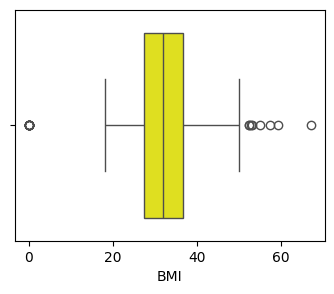

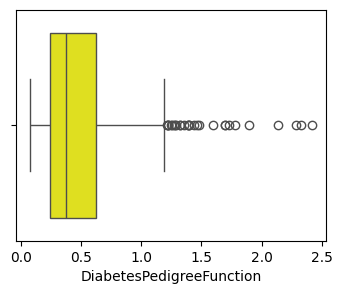

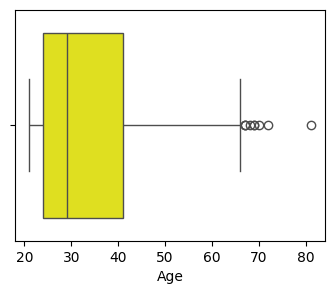

In [18]:
for i in x_vars:
     plt.figure(figsize=(4,3))
     sns.boxplot(x= df[i], color="yellow")
     plt.show()

Insulin and Biabetes PedigreeFunction has more number of outliers 

In [19]:
#Removing the outliers
def remove_outliers(df, features):  
    """  
    Removes outliers from the specified features in the DataFrame.  

    Parameters:  
    - df: The original DataFrame  
    - features: List of column names to check for outliers  

    Returns:  
    - DataFrame with outliers removed from the specified features  
    """  
     
    cleaned_df = df.copy()  
    
    for feature in features:  
        
        Q1 = cleaned_df[feature].quantile(0.25)  
        Q3 = cleaned_df[feature].quantile(0.75)  
        IQR = Q3 - Q1  
         
        lower_bound = Q1 - 1.5 * IQR  
        upper_bound = Q3 + 1.5 * IQR  
         
        cleaned_df[feature] = np.where(  
            (cleaned_df[feature] < lower_bound) | (cleaned_df[feature] > upper_bound),  
            np.nan,   
            cleaned_df[feature]  
        )  
     
    # cleaned_df[features] = cleaned_df[features].fillna(cleaned_df[features].median())  
    
    return cleaned_df  

In [20]:
df2=remove_outliers(df, features=["Insulin","DiabetesPedigreeFunction"])

In [21]:
df2.shape

(768, 9)

In [22]:
df2.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                     34
BMI                          0
DiabetesPedigreeFunction    29
Age                          0
Outcome                      0
dtype: int64

In [23]:
100-(len(df2.dropna())/len(df2)*100) #%of data loss when outliers are removed from the original dataset

7.942708333333343

In [24]:
df2=df2.dropna()

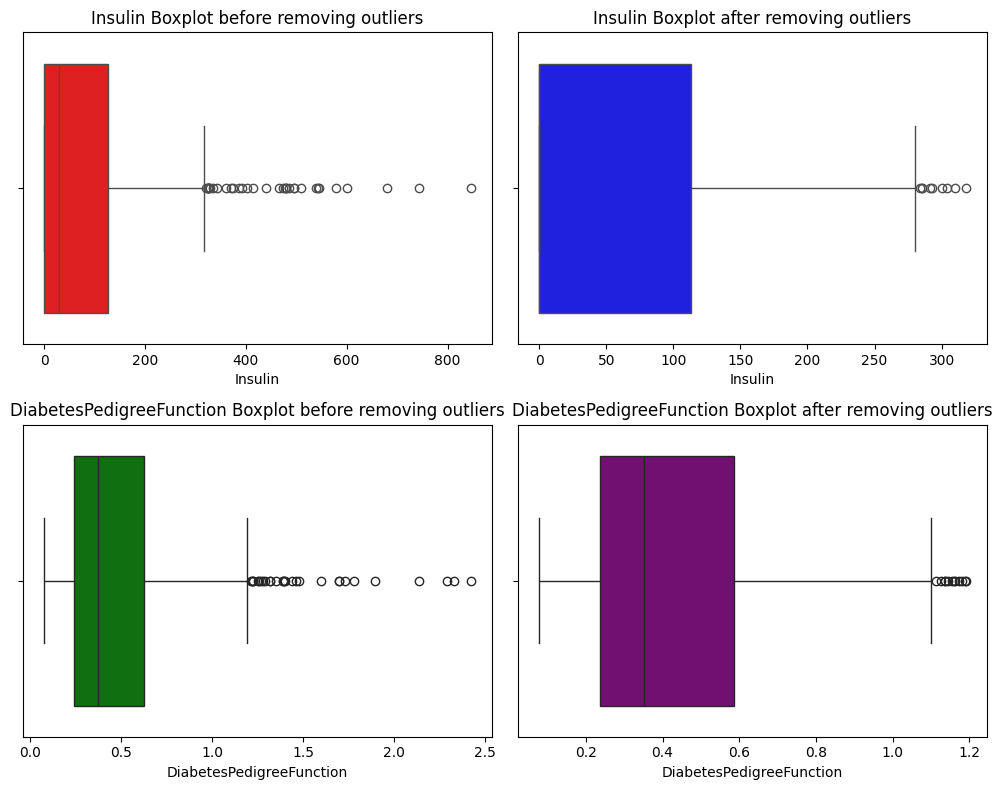

In [25]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))  
sns.boxplot(x=df["Insulin"], ax=axs[0, 0], color="red")  
axs[0, 0].set_title("Insulin Boxplot before removing outliers")  

sns.boxplot(x=df2["Insulin"], ax=axs[0, 1], color="blue")  
axs[0, 1].set_title("Insulin Boxplot after removing outliers")   
  
sns.boxplot(x=df["DiabetesPedigreeFunction"], ax=axs[1, 0], color="green")  
axs[1, 0].set_title("DiabetesPedigreeFunction Boxplot before removing outliers")  

sns.boxplot(x=df2["DiabetesPedigreeFunction"], ax=axs[1, 1], color="purple")  
axs[1, 1].set_title("DiabetesPedigreeFunction Boxplot after removing outliers")  
plt.tight_layout()

Prediction

In [26]:
df2.Outcome.value_counts()                  

Outcome
0    474
1    233
Name: count, dtype: int64

Data imbalance is there so  we will balance the data

In [27]:
x=df2.drop(columns=["Outcome"])   
y=df2["Outcome"]

In [28]:
from imblearn.over_sampling import SMOTE  

smote = SMOTE()  
X_resampled, y_resampled = smote.fit_resample(x, y) 

In [29]:
X_resampled.shape,y_resampled.shape

((948, 8), (948,))

Splitting and scaling the data

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.10,random_state=50)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit(x_train)

In [32]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=10)

In [33]:
lr.fit(x_train,y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [35]:
accuracy_score(y_train, lr.predict(x_train)) #training score

0.7655334114888629

In [36]:
accuracy_score(y_test, lr.predict(x_test))*100  #testing score

74.73684210526315

In [37]:
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        48
           1       0.78      0.68      0.73        47

    accuracy                           0.75        95
   macro avg       0.75      0.75      0.75        95
weighted avg       0.75      0.75      0.75        95



<Axes: >

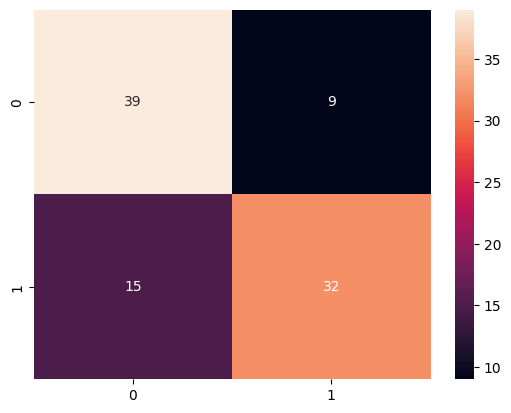

In [38]:
sns.heatmap(confusion_matrix(y_test, lr.predict(x_test)),annot=True)

SVC

In [39]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf",C=100)

In [40]:
svc.fit(x_train,y_train)

SVC(C=100)

In [41]:
accuracy_score(y_test,svc.predict(x_test))*100

83.15789473684211

<Axes: >

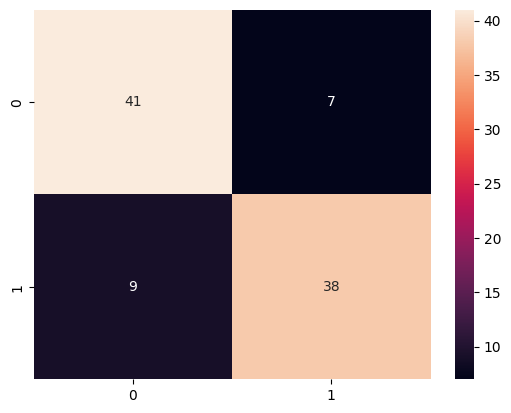

In [42]:
sns.heatmap(confusion_matrix(y_test, svc.predict(x_test)),annot=True)

Random Forest Clssifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [44]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
accuracy_score(y_test,rf.predict(x_test))*100    #testing score

83.15789473684211

In [46]:
accuracy_score(y_train,rf.predict(x_train)) #training score

1.0

<Axes: >

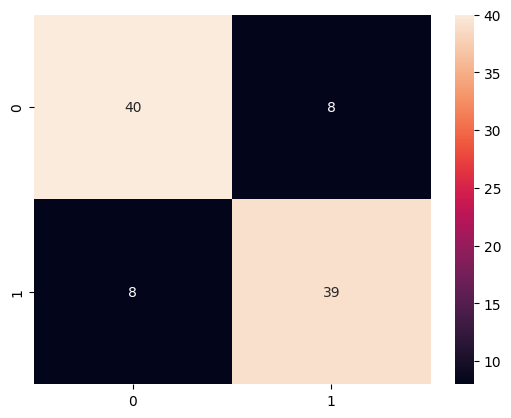

In [47]:
sns.heatmap(confusion_matrix(y_test, rf.predict(x_test)),annot=True)

Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [49]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
accuracy_score(y_test,dt.predict(x_test))    #testing score

0.8

In [51]:
accuracy_score(y_train,dt.predict(x_train))*100    #training score

100.0

<Axes: >

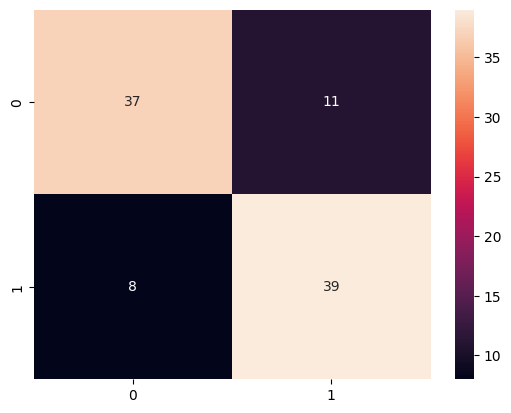

In [52]:
sns.heatmap(confusion_matrix(y_test, dt.predict(x_test)),annot=True)

Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier  

gb_classifier = GradientBoostingClassifier()  


In [54]:
gb_classifier.fit(x_train, y_train)

GradientBoostingClassifier()

In [55]:
accuracy_score(y_test,gb_classifier.predict(x_test))

0.8210526315789474

<Axes: >

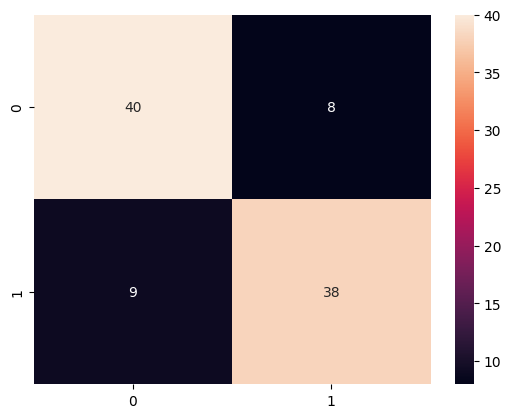

In [56]:
sns.heatmap(confusion_matrix(y_test, gb_classifier.predict(x_test)),annot=True)

ACCURAY FOR DIFFERENT CLASSIFICATION ALGORITHMS

Logistic regression 75.78947368421053

Random Forest Classifier  85.26315789473684

Decision Tree Classifier 0.8

SVC  82.10526315789474

Gradient Boosting Classifier  0.8631578947368421



In [57]:
df2.to_csv("diabetes2.csv")